# Task 2
Made by Roman Efremov, J41325c

In [332]:
%matplotlib inline
import numpy as np
import random
import math
from math import fabs
import matplotlib.pyplot as plt

## Algorithm implementations

In [334]:
def distance_2d(x1, x2):
    return math.hypot(x2[0]- x1[0], x2[1] - x1[0])

In [460]:
# gradient descent with stochastic parameter choose
def gdspc(func_grad, x0, random_state=None, max_steps=None, epsilon=1e-8, learning_rate = 1e-4):
    x = x0
    x_diff_history = []
    history = np.array([x0], copy=True)
    params_num = len(x0)
    
    if random_state is not None:
        random.seed(random_state)
        
    i = 1
    while True:
        gr = func_grad(x0)
        param = random.randint(0, params_num - 1)
        x_prev = x[param]
        x[param] -= learning_rate * gr[param]
        history = np.append(history, [x.copy()], 0)
        x_diff = fabs(x[param] - x_prev)
        if x_diff > 1:
            print('Very big diff at point', x, 'grad is', gr)
        x_diff_history.append(x_diff)
        if max_steps is not None and i >= max_steps:
            break
        if fabs(x[param] - x_prev) < epsilon:
            break
        i += 1
    return { 'result': x, 'steps': i, 'history': history, 'x_diff_history': x_diff_history }

In [397]:
def adam(func_grad, x0, b1=0.9, b2=0.999, a=0.001, max_steps=None, epsilon=1e-8):
    m_prev = np.zeros(x0.shape)
    v_prev = np.zeros(x0.shape)
    step = 1
    x = x0
    e = 1e-8
    x_diff_history = []
    history = np.array([x0], copy=True)
    
    while True:
        gr = func_grad(x0)
        m = m_prev * b1 + gr * (1 - b1)
        v = v_prev * b2 + (gr ** 2) * (1 - b2)
        m_corr = m / (1 - b1 ** step)
        v_corr = v / (1 - b2 ** step)
        x_prev = x.copy()
        diff = m_corr * a / (np.sqrt(v_corr) + e) 
        x -= diff
        history = np.append(history, [x.copy()], 0)
        x_diff = distance_2d(x, x_prev)
        x_diff_history.append(x_diff)
        
        if max_steps is not None and step >= max_steps:
            break
        if x_diff < epsilon:
            break
        
        m_prev = m
        v_prev = v
        step += 1
    
    return { 'result': x, 'steps': step, 'history': history, 'x_diff_history': x_diff_history }

## Functions for testing

In [455]:
def rosenbrock(X):
    x, y = X
    return 100 * (y - x ** 2) ** 2 + (x - 1) ** 2

def rosenbrock_grad(X):
    x, y = X
    return np.array([400 * x ** 3 - 400 * x * y + 2 * x - 2,
                     200 * (y - x ** 2)])
# min is at (1, 1)

In [448]:
def sphere(X):
    x, y = X
    return x ** 2 + y ** 2

def sphere_grad(X):
    x, y = X
    return np.array([2 * x, 2 * y])

# min at (0, 0)

In [322]:
def himmelblau(X):
    x, y = X
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

def himmelblau_grad(X):
    x, y = X
    return np.array([4 * x ** 3 + 4 * x * y - 42 * x + 2 * y ** 2 - 14, 
                    2 * x ** 2 + 4 * x * y + 4 * y ** 3 - 26 * y - 22])
# mins: (3, 2), (-2.805118,3.131312) (-3.779310,-3.283186) (-3.779310,-3.283186) (3.584428,-1.848126)

## Testing of algorithms

In [465]:
funcs = [
    ('Sphere', sphere, sphere_grad, [3., 5.]),
    ('Rosenbrock', rosenbrock, rosenbrock_grad, [-2., -3.1]),
    ('Himmelblau', himmelblau, himmelblau_grad, [-1., -5.]),
]

In [467]:
def plot_fun(history_gdspc, history_adam, func, func_name, ax, x0):
    fig, ax = plt.subplots()
    ax.set_title(func_name)
    
    ax.plot(history_gdspc[:, 0], history_gdspc[:, 1], '-b', label='GDSPC')
    ax.plot(history_adam[:, 0], history_adam[:, 1], '-g', label='Adam')
    ax.plot(x0[0], x0[1], 'ro')
    ax.legend()
    
    xs = np.concatenate([history_gdspc[:, 0], history_adam[:, 0]])
    ys = np.concatenate([history_gdspc[:, 1], history_adam[:, 1]])
    
    extra_coor_perc = 0.1
    
    x_from = np.min(xs)
    x_to = np.max(xs)
    x_diff = (x_to - x_from) * extra_coor_perc
    x_from -= x_diff
    x_to += x_diff
    
    y_from = np.min(ys)
    y_to = np.max(ys)
    y_diff = (y_to - y_from) * extra_coor_perc
    y_from -= y_diff
    y_to += y_diff
    
    x = np.linspace(x_from, x_to, 100)
    y = np.linspace(y_from, y_to, 100)
    X, Y = np.meshgrid(x, y)
    adopted_data_pairs = np.vstack([X.ravel(), Y.ravel()])
    Z = rosenbrock(adopted_data_pairs).reshape(100, 100)
    ax.contour(x, y, Z, 50)
    
def plot_step_size_diff_history(history_gdspc, history_adam, func_name):
    fig, (ax1, ax2) = plt.subplots(2, sharex=False, sharey=False)
    xs_gdspc = np.arange(1, len(history_gdspc) + 1)
    xs_adam = np.arange(1, len(history_adam) + 1)
    ax1.bar(xs_gdspc, history_gdspc, label='GDSPC')
    ax1.set_title(func_name + " step size change",)
    ax1.legend()
    ax2.bar(xs_adam, history_adam, color='g', label='Adam')
    ax2.legend()

For Sphere steps: GDSPC = 63909 adam = 10457
For Sphere result: GDSPC = [0.00499845 0.00842627] adam = [1.21304241e-31 9.86646833e-07]
For Rosenbrock steps: GDSPC = 86309 adam = 21692
For Rosenbrock result: GDSPC = [0.94061799 0.8844706 ] adam = [0.99999902 0.99999804]
For Himmelblau steps: GDSPC = 2827 adam = 300000
For Himmelblau result: GDSPC = [-3.77917805 -3.2829892 ] adam = [-3.77931017 -3.28318608]


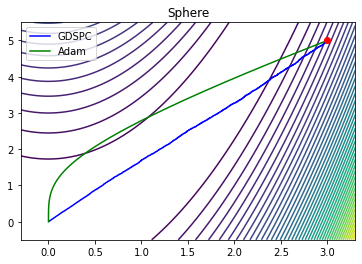

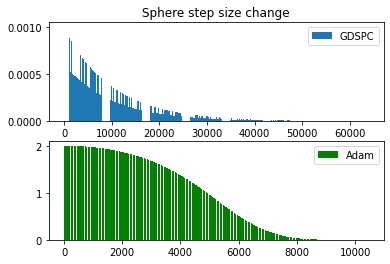

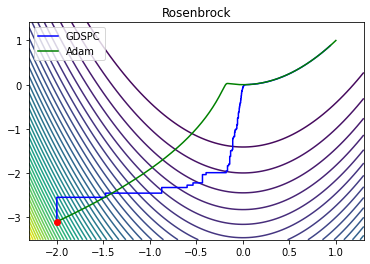

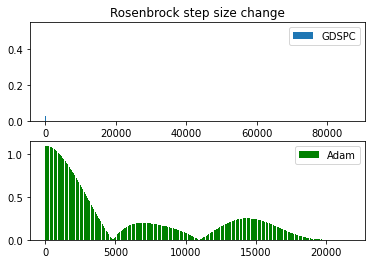

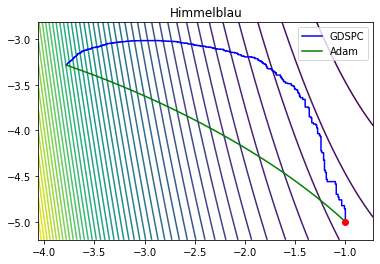

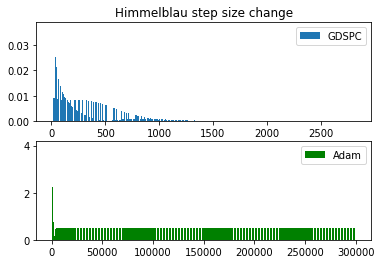

In [468]:
MAX_STEPS = 3e5
EPS = 1e-6
i = 0
for (func_name, func, func_grad, x0) in funcs:
    res_gdspc = gdspc(func_grad, np.array(x0), random_state=666, max_steps=MAX_STEPS, epsilon=EPS)
    res_adam = adam(func_grad, np.array(x0), max_steps=MAX_STEPS, epsilon=EPS)
    print('For', func_name, 'steps: GDSPC =', res_gdspc['steps'], 'adam =', res_adam['steps'])
    print('For', func_name, 'result: GDSPC =', res_gdspc['result'], 'adam =', res_adam['result'])
    plot_fun(res_gdspc['history'], res_adam['history'], func, func_name, ax, x0)
    plot_step_size_diff_history(res_gdspc['x_diff_history'], res_adam['x_diff_history'], func_name)
    i += 1

## Conclusions

From obtained results and plotted graphs it can be concluded that implemented agorithms work well. GDSPC (gradient descent with stochastic parameter choose) trajectory may look strange due to its random nature. But in some cases (with Himmelblau function) stochastic algorithm converges faster. From step size graphs we can see that Adam's algorithm step size changes smoothly, while GDSPC step sizes may change sharply (e.g. with Rosenbrock function, due to big first steps, we can't see any following steps).
